In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from models import LinearRegression
from models import RidgeRegression

In [2]:
df = pd.read_csv('Boston_Housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
X = df.drop(['PRICE'],axis = 1).values
y = df[['PRICE']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


In [5]:
my_model = LinearRegression(learning_rate = 0.1, iterations = 200)
my_model.fit(X_train,y_train)
print(f"Weights = {my_model.W}")
print(f"Bias = {my_model.b}")

Weights = [[-0.95985197]
 [ 1.03830664]
 [-0.0225701 ]
 [ 0.60283139]
 [-1.83582682]
 [ 2.58460696]
 [-0.09736222]
 [-2.87890931]
 [ 1.96828168]
 [-1.71454125]
 [-2.28588259]
 [ 0.71546495]
 [-3.58716524]]
Bias = [22.61188119]


In [6]:
y_pred = my_model.predict(X_test)
print(f"Loss : {my_model.compute_loss(y_pred,y_test)}")

Loss : 33.54409897410466


In [7]:
my_model_ridge = RidgeRegression(learning_rate = 0.1, iterations = 200, lambda_=0.1)
my_model_ridge.fit(X_train,y_train)
print(f"Weights = {my_model_ridge.W}")
print(f"Bias = {my_model_ridge.b}")

Weights = [[-0.7963324 ]
 [ 0.73348709]
 [-0.37224165]
 [ 0.65980324]
 [-1.07114582]
 [ 2.72609136]
 [-0.22202483]
 [-1.99707204]
 [ 0.79716081]
 [-0.83721385]
 [-2.04596704]
 [ 0.71897802]
 [-3.11849224]]
Bias = [22.61188119]


In [8]:
y_pred_ridge = my_model_ridge.predict(X_test)
print(f"Loss : {my_model.compute_loss(y_pred_ridge,y_test)}")

Loss : 36.118427321072865


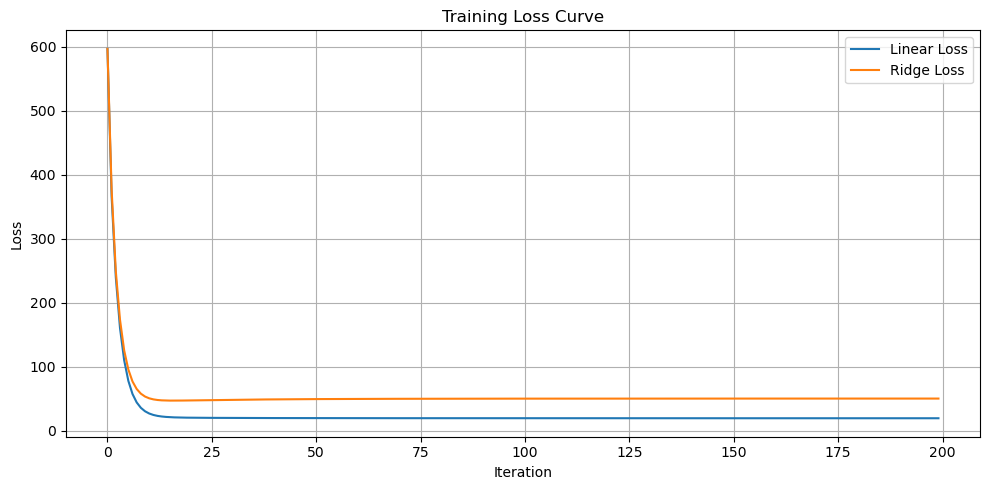

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(my_model.loss_history, label='Linear Loss')
plt.plot(my_model_ridge.loss_history, label='Ridge Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

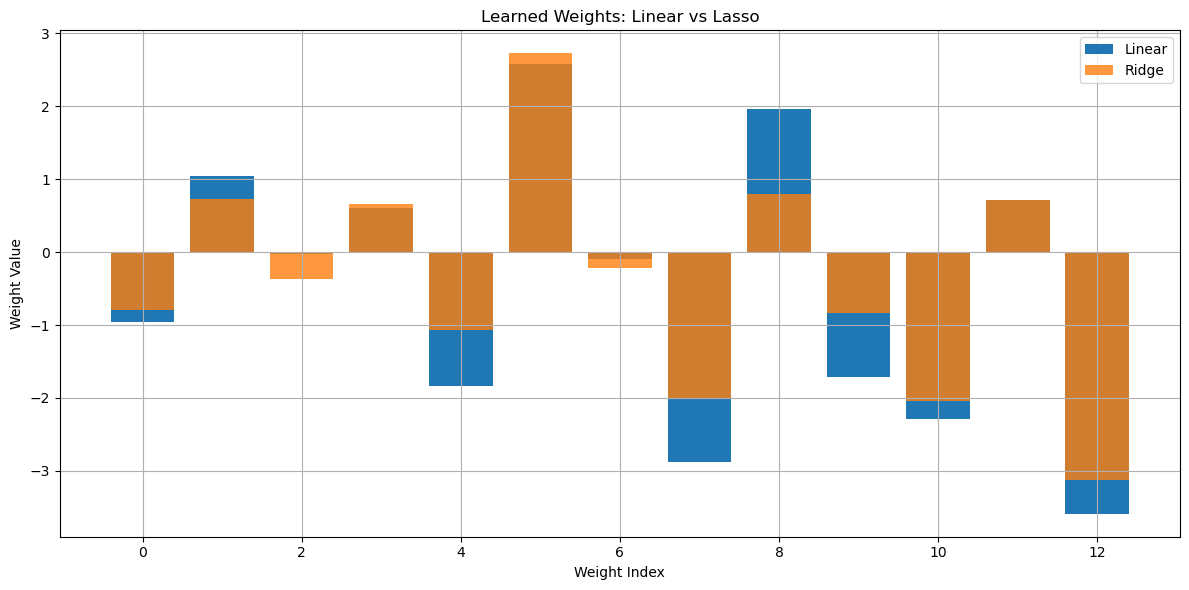

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(my_model.W.flatten())), my_model.W.flatten(), label='Linear')
plt.bar(range(len(my_model_ridge.W.flatten())), my_model_ridge.W.flatten(), alpha=0.8, label='Ridge')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Learned Weights: Linear vs Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()